# Optimize XG Boost - parameters / hyper parameters

In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
import pydotplus
from matplotlib import rcParams
import seaborn as sb


In [2]:
# # Find no. of factors in y
from collections import Counter
# #label encoding
from sklearn.preprocessing import LabelEncoder, scale, MinMaxScaler, StandardScaler,OneHotEncoder,LabelBinarizer
#from sklearn.decomposition import PCA

In [3]:
# Import All classifcation Algorithms
from xgboost import XGBClassifier

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,validation_curve,KFold

In [5]:
# Metrics selection
from sklearn.metrics import  accuracy_score, recall_score, confusion_matrix,precision_recall_fscore_support,classification_report,roc_curve,auc

In [6]:
# Open files Both files are opened as ny drop or changes in feature will be done is both normal and one hot file
df1 = pd.read_csv('3_ITSM_cleansed_Encoded_Engineered.csv')
df1.columns

Index(['c_CI_Cat', 'c_Closure_Code', 'q_No_of_Reassignments',
       'q_No_of_Related_Incidents', 'q_No_of_Related_Interactions',
       't_Close_Time', 't_Open_Time', 't_ReopenFlag',
       't_TicketWIPDurationDays', 'y_Priority'],
      dtype='object')

In [7]:
# Setting the lists
CatVarList = ['c_CI_Cat', 'c_Closure_Code','t_ReopenFlag']
ConVarList = ['q_No_of_Reassignments', 'q_No_of_Related_Incidents','q_No_of_Related_Interactions','t_TicketWIPDurationDays']
DatVarList = ['t_Close_Time', 't_Open_Time']
OutValList = ['y_Priority']

X_All_1 = ['c_CI_Cat', 'c_Closure_Code', 't_ReopenFlag','q_No_of_Reassignments', 
           'q_No_of_Related_Incidents','q_No_of_Related_Interactions','t_TicketWIPDurationDays']
           

In [8]:
# Assign varibale and X and y
X1 = df1[X_All_1]
y1 = pd.DataFrame(df1.y_Priority)

print(X1.shape)
print(y1.shape)

(35846, 7)
(35846, 1)


In [9]:
# Split 80:20
split_seed = 10
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state=split_seed, test_size=.2)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(28676, 7)
(28676, 1)
(7170, 7)
(7170, 1)


In [10]:
y1_train.head()

,y_Priority
23572,4
163,3
30420,3
21679,3
23989,3


## Scaling done based on EDA analysis. Fit on the Train set, but tranform both transform both training and test set

In [11]:
# Scale the data
scaler = StandardScaler()
# Fit on train data
scaler.fit(X1_train[ConVarList])
# Transform both train and test
X1_train[ConVarList] = scaler.transform(X1_train[ConVarList])
X1_test[ConVarList] = scaler.transform(X1_test[ConVarList])

E:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

In [12]:
print(X1_train.shape)
print(X1_test.shape)

(28676, 7)
(7170, 7)


## Grid Search to optimize the hyper parameters

In [13]:
# Parameters used for Grid search to get best parameters. Use this again only to get best parameters..its take a lot of time.
#parameters = {"learning_rate": [.05,.1, .15],
#              "max_depth": [3,5,8,10,15,20],
#              "min_child_weight" : [ 3, 5, 7 ],
#              "gamma"            : [ 0.0, 0.1],
#              "colsample_bytree" : [ 0.1,0.7,0.8], 
#              "scoring"         : ["recall"] 
#             }
parameters = {"learning_rate": [.1],
              "max_depth": [8],
              "min_child_weight" : [5],
              "gamma"            : [0.1],
              "colsample_bytree" : [.8], 
              "scoring"         : ["recall"] 
             }
model = XGBClassifier(booster='gbtree',random_state=380)
grid_model_XGB = GridSearchCV(model, parameters)
grid_model_XGB.fit(X1_train, y1_train)

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=380, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1], 'max_depth': [8], 'min_child_weight': [5], 'gamma': [0.1], 'colsample_bytree': [0.8], 'scoring': ['recall']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
grid_model_XGB.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 5,
 'scoring': 'recall'}

In [18]:
y1_predict = pd.DataFrame(grid_model_XGB.predict(X1_test),columns=['y_Churn'])
print(accuracy_score(y1_test,y1_predict).round(4)*100)
print(confusion_matrix(y1_test,y1_predict))
print(classification_report(y1_test,y1_predict))

68.69
[[   9   11   41   22]
 [   5  295  714   68]
 [   3   69 4113  159]
 [   5   32 1116  508]]
              precision    recall  f1-score   support

           1       0.41      0.11      0.17        83
           2       0.72      0.27      0.40      1082
           3       0.69      0.95      0.80      4344
           4       0.67      0.31      0.42      1661

   micro avg       0.69      0.69      0.69      7170
   macro avg       0.62      0.41      0.45      7170
weighted avg       0.69      0.69      0.64      7170



In [19]:
print(y1_test.shape)
print(y1_predict.shape)

(7170, 1)
(7170, 1)


## Final Model

In [20]:
parameters = {"learning_rate": [.1],
              "max_depth": [8],
              "min_child_weight" : [5],
              "gamma"            : [0.1],
              "colsample_bytree" : [.8], 
              "scoring"         : ["accuracy"] 
             }
model = XGBClassifier(booster='gbtree',random_state=70)
grid_model_XGB = GridSearchCV(model, parameters)
grid_model_XGB.fit(X1_train, y1_train)

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=70, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1], 'max_depth': [8], 'min_child_weight': [5], 'gamma': [0.1], 'colsample_bytree': [0.8], 'scoring': ['accuracy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
# Predicting and converting into Dataframe
#y1_predict = grid_model_XGB.predict(X1_test)
y1_predict = pd.DataFrame(grid_model_XGB.predict(X1_test))
#,columns=['y_Predict_Priority']
Proba = grid_model_XGB.predict_proba(X1_test)
y1_predict.shape
#y1_test.shape

(7170, 1)

In [22]:
# Results
print(accuracy_score(y1_test,y1_predict)*100)
#print(recall_score(y1_test,y1_predict)*100)
#print(classification_report(y1_test,y1_predict))
confusion_matrix(y1_test,y1_predict)
#Counter(y1_predict)

68.95397489539748


array([[   9,   13,   42,   19],
       [   5,  302,  708,   67],
       [   3,   71, 4118,  152],
       [   4,   28, 1114,  515]], dtype=int64)

In [29]:
#Convert to binary

from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=y1_test, 
                      y_predicted=y1_predict, 
                      binary=False, 
                      positive_label=1)


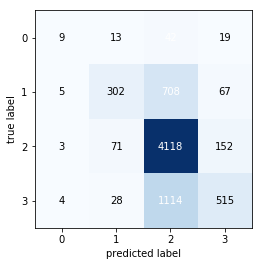

In [37]:
# Plot Confusion matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()